In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_excel('HT_CNbyRef.xlsx')

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
raw_last = raw.sort_values('tDateTime').drop_duplicates(subset='SerialNumber', keep='last')

In [5]:
raw_last.Item152.between(-3,-2,inclusive='both').sum()

189

In [6]:
(raw_last.Item152<-3).sum()

93

In [7]:
len(raw_last)

3240

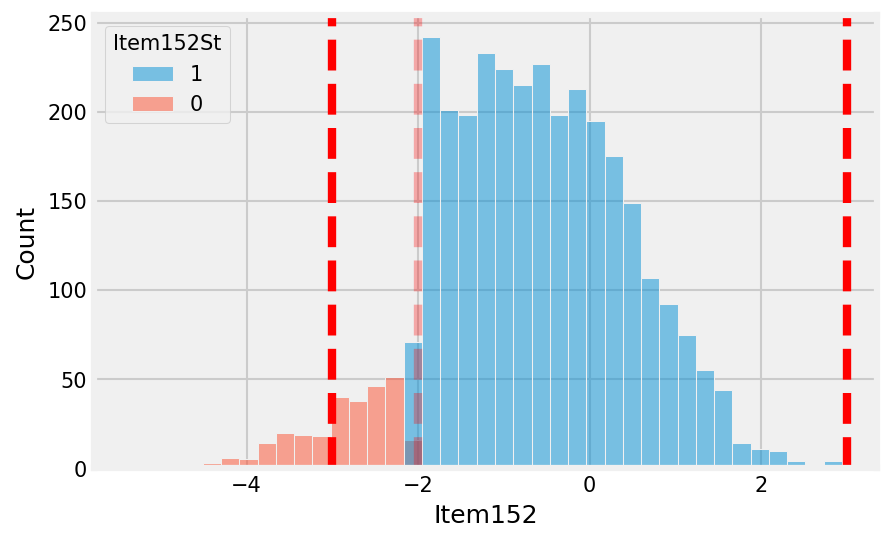

In [8]:
plt.figure(dpi=150)
sns.histplot(raw_last, x='Item152', hue='Item152St', hue_order=[1,0])
plt.axvline(-2, color='red', ls='--', alpha=0.3)
plt.axvline(3, color='red', ls='--')
plt.axvline(-3, color='red', ls='--')

In [9]:
from scipy import stats

In [28]:
fitted_data, fitted_lambda = stats.boxcox(raw_last.Item152+7)

In [12]:
import manufacturing as mn

shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


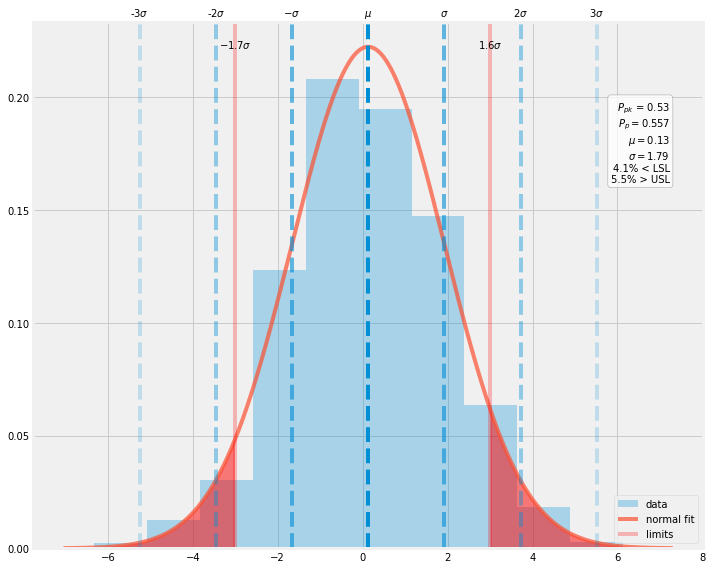

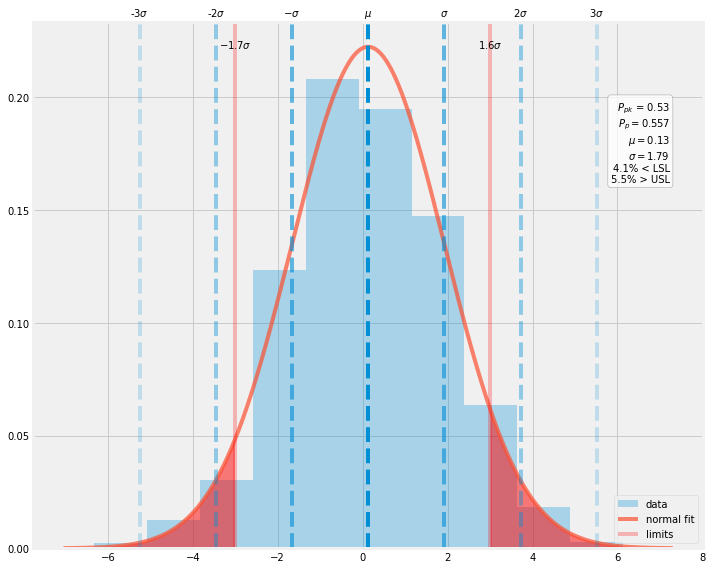

In [30]:
fig,ax = plt.subplots(figsize=(10, 8))
mn.ppk_plot(fitted_data-7, upper_specification_limit=3, lower_specification_limit=-3, figure=fig)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


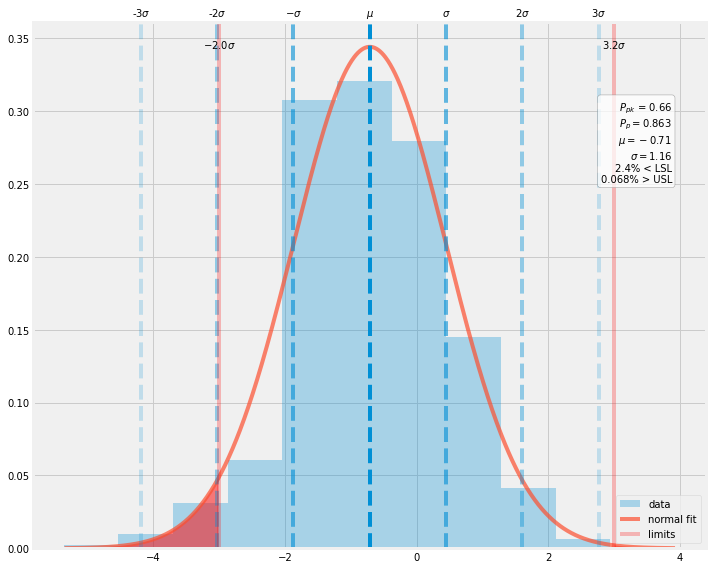

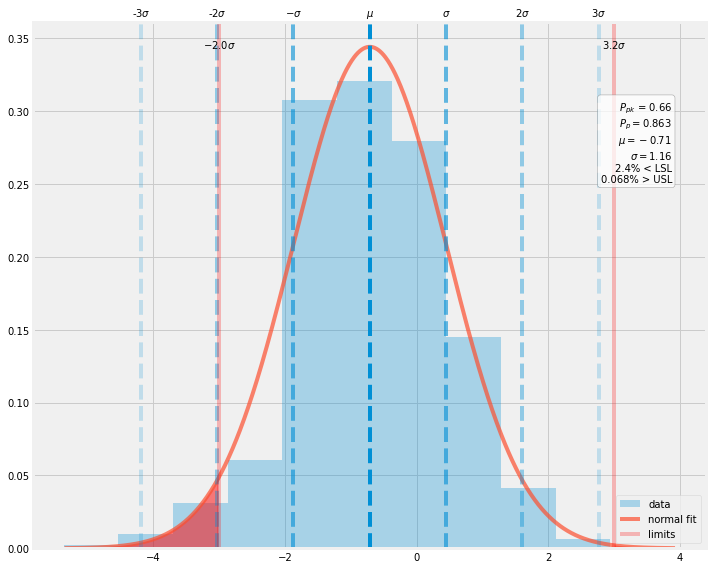

In [14]:
fig,ax = plt.subplots(figsize=(10, 8))
mn.ppk_plot(raw_last.Item152, upper_specification_limit=3, lower_specification_limit=-3, figure=fig)

In [15]:
mn.suggest_specification_limits(raw_last.Item152, sigma_level=3)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-5.056239561155125, 3.6353699420622894)